In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
df['target'] = y
df

,f1,f2,f3,f4,f5,target
0,0.901456,-0.521105,-0.384091,1.087948,1.288587,0
1,2.373808,0.452061,-0.147973,3.059606,1.833839,0
2,-0.551249,-1.606193,-2.681583,0.287305,3.160500,0
3,0.647168,-1.431339,-0.694864,0.186578,-1.939952,1
4,2.442362,0.218570,1.508140,1.271264,-0.560998,0
...,...,...,...,...,...,...
95,-0.851188,-2.064292,0.111758,-1.241790,-1.458013,1
96,2.091166,-0.017561,-1.928753,3.286733,1.493329,0
97,-2.502444,-3.499341,-0.056913,-3.692066,0.093094,1
98,1.270245,-3.004019,-1.435106,0.607564,0.894760,0


In [5]:
import random

In [6]:
def sample_row(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [30]:
def sample_column(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]-1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [8]:
def combine_sampling(df, percent):
    new_df = sample_row(df, percent)
    return sample_column(new_df, percent)

In [11]:
df1 = sample_row(df, 0.1)
df2 = sample_row(df, 0.1)
df3 = sample_row(df, 0.1)

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:, :-1], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, :-1], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, :-1], df3.iloc[:, -1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[0] <= -0.501\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[2] <= -1.246\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

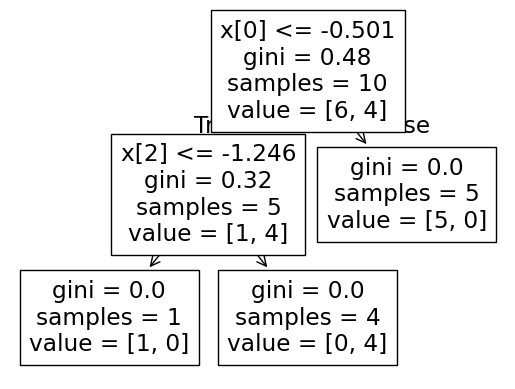

In [15]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.232\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= -2.084\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

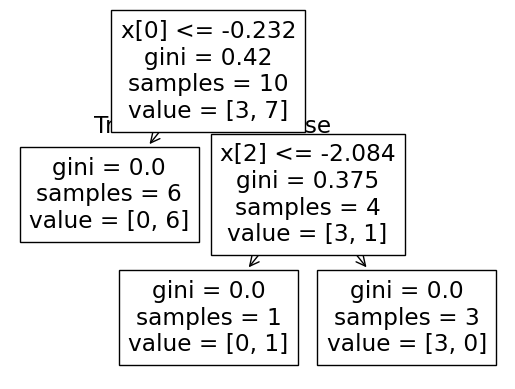

In [16]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= -0.045\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

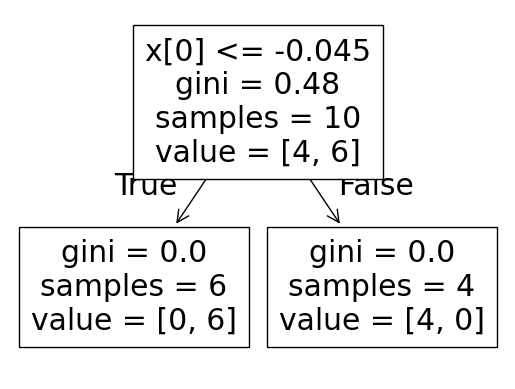

In [17]:
plot_tree(clf3)

In [18]:
df1

,f1,f2,f3,f4,f5,target
89,-0.106516,-0.054373,-1.638776,0.944912,3.529796,0
22,-0.872448,-0.046243,-0.889080,-0.767254,-1.374198,1
55,-0.192998,0.166790,-0.302706,1.025623,4.327674,0
30,-1.600535,-0.099030,-1.213881,-0.653097,0.390275,1
84,-1.710405,-0.063489,-1.278229,-1.061547,-0.768101,0
99,1.145153,-2.252019,1.962232,-0.845348,0.177826,0
44,2.509157,-1.252875,-1.840325,2.487615,-0.468509,0
26,-0.809492,-5.228664,0.724766,-1.819929,-0.284281,1
0,0.901456,-0.521105,-0.384091,1.087948,1.288587,0
22,-0.872448,-0.046243,-0.889080,-0.767254,-1.374198,1


In [22]:
print("Model 1 : ",clf1.predict(np.array([-0.106516, -0.054373, -1.638776, 0.944912, 3.529796]).reshape(1, 5)))
print("Model 2 : ",clf2.predict(np.array([-0.106516, -0.054373, -1.638776, 0.944912, 3.529796]).reshape(1, 5)))
print("Model 3 : ",clf3.predict(np.array([-0.106516, -0.054373, -1.638776, 0.944912, 3.529796]).reshape(1, 5)))

Model 1 :  [0]
Model 2 :  [0]
Model 3 :  [1]


d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Column Sample

In [32]:
df1 = sample_column(df, 0.8)
df2 = sample_column(df, 0.8)
df3 = sample_column(df, 0.8)

from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

clf1.fit(df1.iloc[:, :-1], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, :-1], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, :-1], df3.iloc[:, -1])

from sklearn.tree import plot_tree

C:\Users\dsnar\AppData\Local\Temp\ipykernel_3644\3884268710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\dsnar\AppData\Local\Temp\ipykernel_3644\3884268710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\dsnar\AppData\Local\Temp\ipykernel_3644\3884268710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

[Text(0.42391304347826086, 0.9166666666666666, 'x[1] <= -0.378\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.21739130434782608, 0.75, 'x[2] <= -0.607\ngini = 0.187\nsamples = 48\nvalue = [5, 43]'),
 Text(0.32065217391304346, 0.8333333333333333, 'True  '),
 Text(0.13043478260869565, 0.5833333333333334, 'x[0] <= -0.726\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.08695652173913043, 0.4166666666666667, 'x[0] <= -0.778\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.043478260869565216, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.13043478260869565, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.4166666666666667, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.30434782608695654, 0.5833333333333334, 'x[0] <= -0.368\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2608695652173913, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.34782608695652173, 0.4166666666666667, 'x[1] <= -1.268\

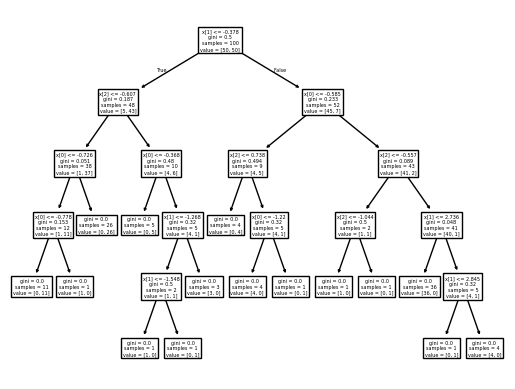

In [34]:
plot_tree(clf1)

[Text(0.5875, 0.9444444444444444, 'x[2] <= -0.378\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.375, 0.8333333333333334, 'x[1] <= 2.069\ngini = 0.187\nsamples = 48\nvalue = [5, 43]'),
 Text(0.48125, 0.8888888888888888, 'True  '),
 Text(0.325, 0.7222222222222222, 'x[0] <= 1.713\ngini = 0.156\nsamples = 47\nvalue = [4, 43]'),
 Text(0.2, 0.6111111111111112, 'x[2] <= -0.554\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.1, 0.5, 'x[0] <= -1.42\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.05, 0.3888888888888889, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.15, 0.3888888888888889, 'x[0] <= -1.272\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.1, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.2777777777777778, 'x[2] <= -1.548\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.15, 0.16666666666666666, 'x[2] <= -1.644\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.1, 0.05555555555555555, 'gini = 0.0\nsamples

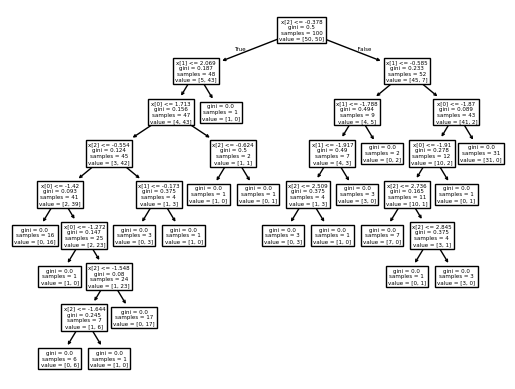

In [35]:
plot_tree(clf2)

[Text(0.7355769230769231, 0.95, 'x[2] <= 1.138\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5480769230769231, 0.85, 'x[1] <= -0.799\ngini = 0.447\nsamples = 74\nvalue = [25, 49]'),
 Text(0.6418269230769231, 0.8999999999999999, 'True  '),
 Text(0.28846153846153844, 0.75, 'x[0] <= -0.943\ngini = 0.497\nsamples = 48\nvalue = [22, 26]'),
 Text(0.15384615384615385, 0.65, 'x[0] <= -1.613\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.11538461538461539, 0.55, 'x[2] <= -0.539\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.07692307692307693, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15384615384615385, 0.45, 'x[2] <= 0.443\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.07692307692307693, 0.35, 'x[0] <= -1.726\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.038461538461538464, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.11538461538461539, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.35, 'x[2] <=

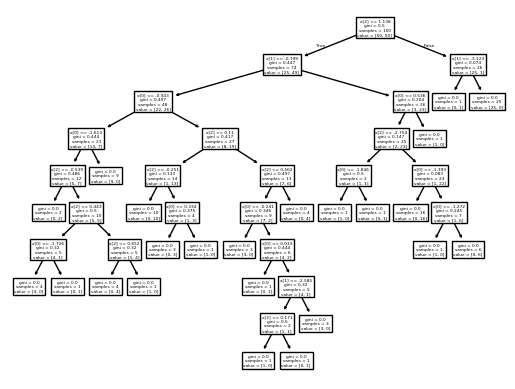

In [36]:
plot_tree(clf3)

In [43]:
df3.iloc[:1, :]

,f3,f2,f5,target
0,-0.384091,-0.521105,1.288587,0


In [45]:
print("Model 1 : ",clf1.predict(np.array([-0.384091, -0.521105, 1.288587]).reshape(1, 3)))
print("Model 2 : ",clf2.predict(np.array([-0.384091, -0.521105, 1.288587]).reshape(1, 3)))
print("Model 3 : ",clf3.predict(np.array([-0.384091, -0.521105, 1.288587]).reshape(1, 3)))

Model 1 :  [1]
Model 2 :  [0]
Model 3 :  [0]


d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [47]:
df1 = combine_sampling(df, 0.5)
df2 = combine_sampling(df, 0.5)
df3 = combine_sampling(df, 0.5)

from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

clf1.fit(df1.iloc[:, :-1], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, :-1], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, :-1], df3.iloc[:, -1])

from sklearn.tree import plot_tree

C:\Users\dsnar\AppData\Local\Temp\ipykernel_3644\3884268710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\dsnar\AppData\Local\Temp\ipykernel_3644\3884268710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\dsnar\AppData\Local\Temp\ipykernel_3644\3884268710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

[Text(0.375, 0.9, 'x[1] <= -0.057\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.16666666666666666, 0.7, 'x[0] <= 2.328\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.2708333333333333, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.7, 'x[0] <= -0.539\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.4791666666666667, 0.8, '  False'),
 Text(0.4166666666666667, 0.5, 'x[1] <= 2.024\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5, 'x[0] <= 0.948\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.8333333333333334, 0.3, 'x[0] <= 1.076\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.75, 0.1, 'gini =

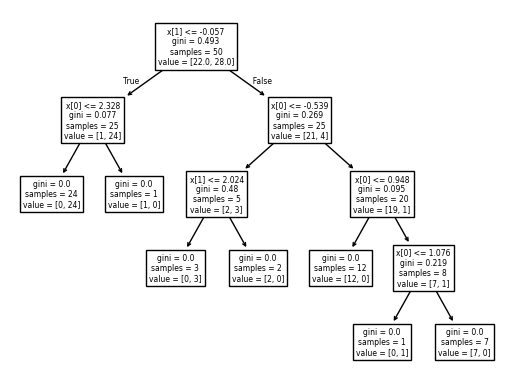

In [48]:
plot_tree(clf1)

[Text(0.5, 0.9166666666666666, 'x[1] <= -0.378\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2, 0.75, 'x[0] <= -0.607\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= -0.816\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= -0.464\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.25, 'x[0] <= -0.271\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.75, 'x[1] <= 0.397\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.65, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 

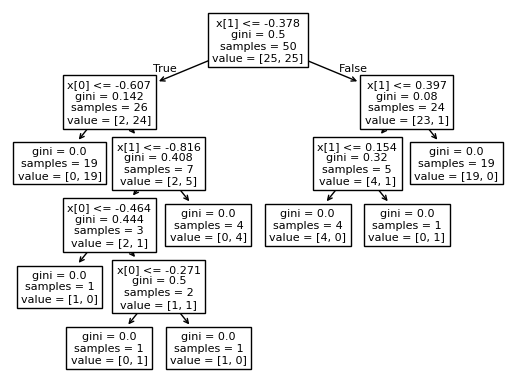

In [49]:
plot_tree(clf2)

[Text(0.45454545454545453, 0.9285714285714286, 'x[0] <= 0.015\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.18181818181818182, 0.7857142857142857, 'x[0] <= -1.399\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.3181818181818182, 0.8571428571428572, 'True  '),
 Text(0.09090909090909091, 0.6428571428571429, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.2727272727272727, 0.6428571428571429, 'x[0] <= -0.883\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.36363636363636365, 0.5, 'x[1] <= -3.347\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.2727272727272727, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.45454545454545453, 0.35714285714285715, 'x[1] <= -2.616\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.36363636363636365, 0.21428571428571427, 'x[0] <= -0.41\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2727272727272727, 0.071428571

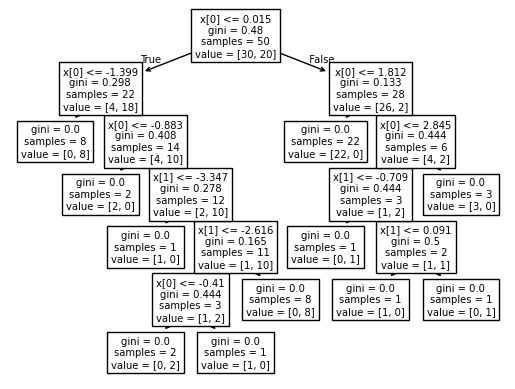

In [50]:
plot_tree(clf3)

In [54]:
df3.iloc[:1, :]

,f4,f2,target
32,0.915755,-1.54148,0


In [55]:
print("Model 1 : ",clf1.predict(np.array([0.915755, -1.54148]).reshape(1, 2)))
print("Model 2 : ",clf2.predict(np.array([0.915755, -1.54148]).reshape(1, 2)))
print("Model 3 : ",clf3.predict(np.array([0.915755, -1.54148]).reshape(1, 2)))

Model 1 :  [1]
Model 2 :  [0]
Model 3 :  [0]


d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Main_Files\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
